In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import nan as NA

In [6]:
mpg=pd.read_csv('https://gist.githubusercontent.com/omarish/5687264/raw/7e5c814ce6ef33e25d5259c1fe79463c190800d9/mpg.csv')
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [8]:
import pydataset
mpg=pydataset.data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [17]:
#제조사별로 묶고  cty hwy의 평균
mpg.groupby('manufacturer')['cty','hwy'].mean().head()

C:\Users\user\AppData\Local\Temp\ipykernel_9912\1106310066.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mpg.groupby('manufacturer')['cty','hwy'].mean().head()


,cty,hwy
manufacturer,,
audi,17.611111,26.444444
chevrolet,15.000000,21.894737
dodge,13.135135,17.945946
ford,14.000000,19.360000
honda,24.444444,32.555556


In [21]:
ti=pydataset.data('titanic')
ti.head(2)

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes


In [106]:
#size() 이런건 시리즈로 나옴 . 
ti.groupby(['sex','age']).count()


class  survived
sex   age                    
man   adults    805       805
      child      64        64
women adults    402       402
      child      45        45

<Axes: xlabel='sex'>

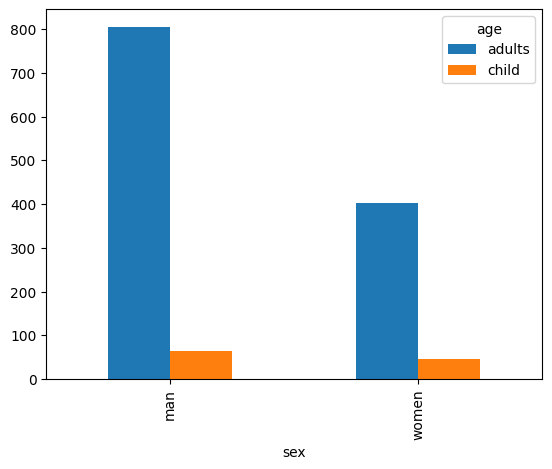

In [100]:
b=ti.groupby(['sex','age']).size().unstack()
b.plot(kind='bar')

<Axes: xlabel='sex'>

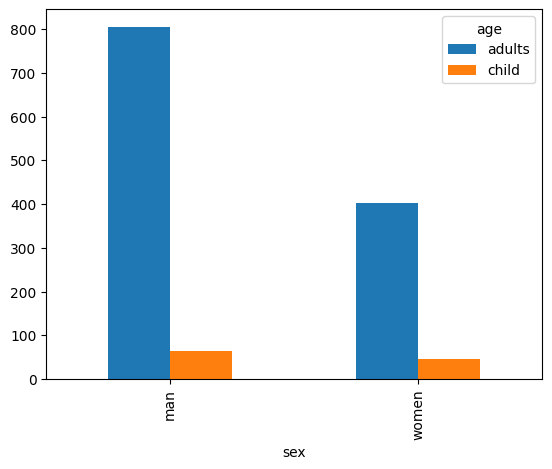

In [107]:
df=pd.DataFrame(ti.groupby(['sex','age']).size().unstack(),
               index=pd.Index(['man','women'],name='sex'),
               columns=pd.Index(['adults','child'],name='age')
               )
df.plot.bar() 

In [274]:
import numpy as np
df1 = pd.DataFrame(np.arange(6).reshape(3, 2),
                   index = pd.Index(['a', 'b', 'c'], name = "lkey"),
                    columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2),
                   index = pd.Index(['a', 'c'], name = "rkey"),
                     columns=['three', 'four']) 
a=pd.concat([df1,df2],axis=1,keys=['lkey','rkey'])
print(a)
ab=pd.merge(df1,df2,left_on='lkey',right_on='rkey',how='outer') 
ab

  lkey      rkey     
   one two three four
a    0   1   5.0  6.0
b    2   3   NaN  NaN
c    4   5   7.0  8.0


,one,two,three,four
0,0,1,5.0,6.0
1,2,3,NaN,NaN
2,4,5,7.0,8.0


In [146]:
CanPop=pydataset.data('CanPop')
CanPop.head(5)

,year,population
1,1851,2.436
2,1861,3.230
3,1871,3.689
4,1881,4.325
5,1891,4.833


In [149]:
CanPop['century']=np.where(CanPop['year']>1900,'20th','19th')
CanPop

,year,population,century
1,1851,2.436,19th
2,1861,3.230,19th
3,1871,3.689,19th
4,1881,4.325,19th
5,1891,4.833,19th
6,1901,5.371,20th
7,1911,7.207,20th
8,1921,8.788,20th
9,1931,10.377,20th
10,1941,11.507,20th


<Axes: xlabel='year'>

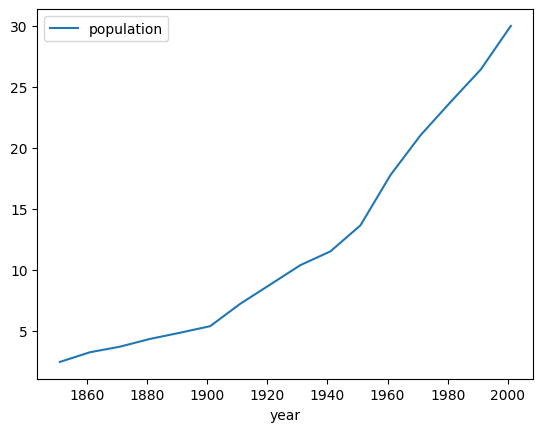

In [156]:
CanPop.plot(x='year')

In [165]:
np.random.seed(1111)
df=pd.DataFrame({'key1' : ['a','a','b','b','a'],
                 'key2' : ['one','two','one','two','one'],
                 'data1': np.random.rand(5),
                 'data2': np.random.rand(5)}) 
df

,key1,key2,data1,data2
0,a,one,0.095549,0.235595
1,a,two,0.925004,0.237792
2,b,one,0.343573,0.735916
3,b,two,0.310477,0.495468
4,a,one,0.002010,0.784425


In [176]:
#[]대괄호 2번 묶으면 df 
df.groupby('key1')['data1']
df.groupby('key1')[['data1']]

In [184]:
list(df.groupby(['key1','key2']))
df.groupby(['key1','key2'])[['data2']].sum()

data2
key1 key2          
a    one   1.020020
     two   0.237792
b    one   0.735916
     two   0.495468

## 칼럼 이름 매핑하기

In [186]:
people = pd.DataFrame(np.random.randn(5, 5),
   ....:                       columns=['a', 'b', 'c', 'd', 'e'],
   ....:                       index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,0.306886,0.908499,-0.797128,-0.680464,0.210951
Steve,-0.398179,-0.736088,-0.916047,-0.480404,0.271730
Wes,-1.967117,1.275866,0.742420,1.129143,-0.542501
Jim,-0.127811,-1.063337,-0.904403,-0.769325,-0.565759
Travis,-0.407168,0.749456,0.250640,1.223743,0.470718


In [192]:
mapping={'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}
people.groupby(mapping,axis=1).sum()

,blue,red
Joe,-1.477592,1.426336
Steve,-1.396450,-0.862537
Wes,1.871563,-1.233752
Jim,-1.673727,-1.756907
Travis,1.474383,0.813006


In [190]:
people.groupby(mapping,axis=1)

In [193]:
m_series=pd.Series(mapping)

people.groupby(m_series,axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,2,3
Jim,2,3
Travis,2,3


## 함수로 그루핑하기

In [196]:
#이름의 길이가 동일하면 같은 사람 취급 
list(people.groupby(len))

[(3,
              a         b         c         d         e
  Joe  0.306886  0.908499 -0.797128 -0.680464  0.210951
  Wes -1.967117  1.275866  0.742420  1.129143 -0.542501
  Jim -0.127811 -1.063337 -0.904403 -0.769325 -0.565759),
 (5,
                a         b         c         d        e
  Steve -0.398179 -0.736088 -0.916047 -0.480404  0.27173),
 (6,
                 a         b        c         d         e
  Travis -0.407168  0.749456  0.25064  1.223743  0.470718)]

In [198]:
#이름이 3글자, 5글자, 6글자 
people.groupby(len).sum()

,a,b,c,d,e
3,-1.788042,1.121028,-0.959110,-0.320646,-0.897310
5,-0.398179,-0.736088,-0.916047,-0.480404,0.271730
6,-0.407168,0.749456,0.250640,1.223743,0.470718


## 색인 단계로 그루핑하기 

In [200]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
   ....:                                     [1, 3, 5, 1, 3]],
   ....:                                     names=['cty', 'tenor']) 
columns

MultiIndex([('US', 1),
            ('US', 3),
            ('US', 5),
            ('JP', 1),
            ('JP', 3)],
           names=['cty', 'tenor'])

In [201]:
hier_df=pd.DataFrame(np.random.randn(4,5),columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.245886 -0.006281 -0.875450  2.687981 -0.086631
1     -0.019359 -0.014420 -0.646707 -2.365920  0.138667
2      0.699661 -0.742417  1.592491  0.823952 -0.662358
3     -0.115101 -0.874807 -1.464829 -0.605945 -0.798746

In [273]:
hier_df.groupby(level='cty',axis=1).count()
hier_df.groupby(level='tenor',axis=1).count()

tenor,1,3,5
0,2,2,1
1,2,2,1
2,2,2,1
3,2,2,1


In [262]:
grouped=df.groupby('key1')
list(grouped)
grouped.sum()
grouped.max()
grouped.std()


C:\Users\user\AppData\Local\Temp\ipykernel_9912\1093419536.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.sum()
C:\Users\user\AppData\Local\Temp\ipykernel_9912\1093419536.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.std()


,data1,data2
key1,,
a,0.508046,0.316235
b,0.023403,0.170022


In [233]:
grouped.quantile(0.9)

C:\Users\user\AppData\Local\Temp\ipykernel_9912\3683504509.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.quantile(0.9)


,data1,data2
key1,,
a,0.759113,0.675099
b,0.340264,0.711871


In [231]:
grouped['data1'].quantile(0.9)
grouped.quantile(0.9)['data1'] 

key1
a    0.759113
b    0.340264
Name: data1, dtype: float64

In [276]:
df1=df.iloc[:,[2,3]].copy()
#df1=df1.max()-df1.min()
df1.loc[len(df)]=df1.max()-df1.min()
df1

,data1,data2
0,0.095549,0.235595
1,0.925004,0.237792
2,0.343573,0.735916
3,0.310477,0.495468
4,0.002010,0.784425
5,0.922994,0.548831


In [285]:
def min_max(x):
    return x.max()-x.min()
df1.apply(min_max)
grouped.agg(min_max) #사용자 정의함수 .agg 붙여주면 내장마냥 사용 가능 , grouped= groupby('key1')

C:\Users\user\AppData\Local\Temp\ipykernel_9912\3546335091.py:4: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(min_max)


,data1,data2
key1,,
a,0.922994,0.548831
b,0.033096,0.240448


In [288]:
def peak_to_peak(arr):
    return arr.max()-arr.min()
df.groupby('key1').agg(peak_to_peak)
df.groupby('key1')[['data1','data2']].apply(peak_to_peak)

C:\Users\user\AppData\Local\Temp\ipykernel_9912\1212748124.py:3: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('key1').agg(peak_to_peak)


,data1,data2
key1,,
a,0.922994,0.548831
b,0.033096,0.240448


In [308]:
## 칼럼에 여러 함수 적용 
tips=pydataset.data('tips')
tips['tip_pct']= tips['tip_pct']=(tips.tip/(tips.total_bill-tips.tip))
grouped=tips.groupby(['day','smoker'])
tips.groupby(['day','smoker']).mean()

C:\Users\user\AppData\Local\Temp\ipykernel_9912\865481453.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['day','smoker']).mean()


total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.179740
     Yes      16.813333  2.714000  2.066667  0.216293
Sat  No       19.661778  3.102889  2.555556  0.190412
     Yes      21.276667  2.875476  2.476190  0.179833
Sun  No       20.506667  3.167895  2.929825  0.193617
     Yes      24.120000  3.516842  2.578947  0.322021
Thur No       17.113111  2.673778  2.488889  0.193424
     Yes      19.190588  3.030000  2.352941  0.198508

In [314]:
list(grouped['tip_pct'])
grouped['tip_pct'].mean()
grouped['tip_pct'].agg('mean')


day   smoker
Fri   No        0.179740
      Yes       0.216293
Sat   No        0.190412
      Yes       0.179833
Sun   No        0.193617
      Yes       0.322021
Thur  No        0.193424
      Yes       0.198508
Name: tip_pct, dtype: float64

In [316]:
grouped.agg({'tip':np.max, 'size':'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [324]:
## 2가지 이상의 집계 함수 적용 

grouped['tip_pct'].mean()
grouped['tip_pct'].sum()
grouped['tip_pct'].agg([('평균','mean'),('합계','sum')])

평균         합계
day  smoker                     
Fri  No      0.179740   0.718960
     Yes     0.216293   3.244395
Sat  No      0.190412   8.568545
     Yes     0.179833   7.552972
Sun  No      0.193617  11.036159
     Yes     0.322021   6.118397
Thur No      0.193424   8.704072
     Yes     0.198508   3.374631

In [325]:
functions=['count','mean','max']
a=grouped['tip_pct','total_bill'].agg(functions)
a

C:\Users\user\AppData\Local\Temp\ipykernel_9912\2183767518.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=grouped['tip_pct','total_bill'].agg(functions)


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.179740  0.231125          4  18.420000  22.75
     Yes         15  0.216293  0.357737         15  16.813333  40.17
Sat  No          45  0.190412  0.412409         45  19.661778  48.33
     Yes         42  0.179833  0.483092         42  21.276667  50.81
Sun  No          57  0.193617  0.338101         57  20.506667  48.17
     Yes         19  0.322021  2.452381         19  24.120000  45.35
Thur No          45  0.193424  0.362976         45  17.113111  41.19
     Yes         17  0.198508  0.317965         17  19.190588  43.11

In [377]:
tips.groupby(['day','smoker'],as_index=False).mean()

C:\Users\user\AppData\Local\Temp\ipykernel_9912\399998865.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['day','smoker'],as_index=False).mean()


,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.179740
1,Fri,Yes,16.813333,2.714000,2.066667,0.216293
2,Sat,No,19.661778,3.102889,2.555556,0.190412
3,Sat,Yes,21.276667,2.875476,2.476190,0.179833
4,Sun,No,20.506667,3.167895,2.929825,0.193617
5,Sun,Yes,24.120000,3.516842,2.578947,0.322021
6,Thur,No,17.113111,2.673778,2.488889,0.193424
7,Thur,Yes,19.190588,3.030000,2.352941,0.198508


In [326]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   tip_pct     244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.2+ KB


In [329]:
tips.sort_values('day') # srt 대소문자 상관없이 가능 

,total_bill,tip,sex,smoker,day,time,size,tip_pct
97,27.28,4.00,Male,Yes,Fri,Dinner,2,0.171821
102,15.38,3.00,Female,Yes,Fri,Dinner,2,0.242326
99,21.01,3.00,Male,Yes,Fri,Dinner,2,0.166574
98,12.03,1.50,Male,Yes,Fri,Dinner,2,0.142450
96,40.17,4.73,Male,Yes,Fri,Dinner,4,0.133465
...,...,...,...,...,...,...,...,...
133,11.17,1.50,Female,No,Thur,Lunch,2,0.155119
132,20.27,2.83,Female,No,Thur,Lunch,2,0.162271
131,19.08,1.50,Male,No,Thur,Lunch,2,0.085324
129,11.38,2.00,Female,No,Thur,Lunch,2,0.213220


### Apply

In [492]:
#상위 5개
def top(df,n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:] 
top(tips)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
184,23.17,6.50,Male,Yes,Sun,Dinner,4,0.389922
233,11.61,3.39,Male,No,Sat,Dinner,2,0.412409
68,3.07,1.00,Female,Yes,Sat,Dinner,1,0.483092
179,9.60,4.00,Female,Yes,Sun,Dinner,2,0.714286
173,7.25,5.15,Male,Yes,Sun,Dinner,2,2.452381


In [373]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     89        24.71  5.85    Male     No  Thur   Lunch     2  0.310180
       186       20.69  5.00    Male     No   Sun  Dinner     5  0.318674
       52        10.29  2.60  Female     No   Sun  Dinner     2  0.338101
       150        7.51  2.00    Male     No  Thur   Lunch     2  0.362976
       233       11.61  3.39    Male     No   Sat  Dinner     2  0.412409
Yes    110       14.31  4.00  Female    Yes   Sat  Dinner     2  0.387973
       184       23.17  6.50    Male    Yes   Sun  Dinner     4  0.389922
       68         3.07  1.00  Female    Yes   Sat  Dinner     1  0.483092
       179        9.60  4.00  Female    Yes   Sun  Dinner     2  0.714286
       173        7.25  5.15    Male    Yes   Sun  Dinner     2  2.452381

In [490]:
#상위 5개
def top(df,n, column='tip_pct'):
    return df.sort_values(by='tip_pct',ascending=False)[:n]
top(tips,5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
173,7.25,5.15,Male,Yes,Sun,Dinner,2,2.452381
179,9.60,4.00,Female,Yes,Sun,Dinner,2,0.714286
68,3.07,1.00,Female,Yes,Sat,Dinner,1,0.483092
233,11.61,3.39,Male,No,Sat,Dinner,2,0.412409
184,23.17,6.50,Male,Yes,Sun,Dinner,4,0.389922


In [352]:
def top(df,column,n):
    return df.sort_values(by=column,ascending=False)[:n]
top(tips,'tip',3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
171,50.81,10.00,Male,Yes,Sat,Dinner,3,0.245038
213,48.33,9.00,Male,No,Sat,Dinner,4,0.228833
24,39.42,7.58,Male,No,Sat,Dinner,4,0.238065


In [358]:
def top(df,column='tip_pct',n=3):
    return df.sort_values(by=column,ascending=False)[:n]

In [493]:
#남녀별 tip_pct상위 3명
tips.groupby('sex').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
sex                                                                      
Female 222       13.42  3.48  Female    Yes   Fri   Lunch     2  0.350101
       94        16.32  4.30  Female    Yes   Fri  Dinner     2  0.357737
       110       14.31  4.00  Female    Yes   Sat  Dinner     2  0.387973
       68         3.07  1.00  Female    Yes   Sat  Dinner     1  0.483092
       179        9.60  4.00  Female    Yes   Sun  Dinner     2  0.714286
Male   182       23.33  5.65    Male    Yes   Sun  Dinner     2  0.319570
       150        7.51  2.00    Male     No  Thur   Lunch     2  0.362976
       184       23.17  6.50    Male    Yes   Sun  Dinner     4  0.389922
       233       11.61  3.39    Male     No   Sat  Dinner     2  0.412409
       173        7.25  5.15    Male    Yes   Sun  Dinner     2  2.452381

In [494]:
#default는 함수안에 5명, tip_pct이지만 바꿀수잇음 
tips.groupby('sex').apply(top,n=3,column='size')

total_bill   tip     sex smoker   day    time  size   tip_pct
sex                                                                      
Female 156       29.85  5.14  Female     No   Sun  Dinner     5  0.208013
       144       27.05  5.00  Female     No  Thur   Lunch     6  0.226757
       126       29.80  4.20  Female     No  Thur   Lunch     6  0.164062
Male   143       41.19  5.00    Male     No  Thur   Lunch     5  0.138160
       142       34.30  6.70    Male     No  Thur   Lunch     6  0.242754
       157       48.17  5.00    Male     No   Sun  Dinner     6  0.115821

In [380]:
tips.groupby('sex',group_keys=False).apply(top,n=5,column='size')

,total_bill,tip,sex,smoker,day,time,size,tip_pct
158,25.00,3.75,Female,No,Sun,Dinner,4,0.176471
198,43.11,5.00,Female,Yes,Thur,Lunch,4,0.131199
156,29.85,5.14,Female,No,Sun,Dinner,5,0.208013
144,27.05,5.00,Female,No,Thur,Lunch,6,0.226757
126,29.80,4.20,Female,No,Thur,Lunch,6,0.164062
217,28.15,3.00,Male,Yes,Sat,Dinner,5,0.119284
186,20.69,5.00,Male,No,Sun,Dinner,5,0.318674
143,41.19,5.00,Male,No,Thur,Lunch,5,0.138160
142,34.30,6.70,Male,No,Thur,Lunch,6,0.242754
157,48.17,5.00,Male,No,Sun,Dinner,6,0.115821


In [495]:
frame= pd.DataFrame({'data1':np.random.randn(1000), 'data2':np.random.randn(1000)})
#90% 지점은? 
frame.quantile(0.9)
#data1의 4등분
quartiles=pd.cut(frame.data1,4,labels=['a','b','c','d'])
frame.groupby(quartiles).sum() #새로운 열 만들지 않고 사용 가능 

,data1,data2
data1,,
a,-55.003033,-2.966360
b,-318.904146,19.187653
c,214.731107,-3.250653
d,200.978964,-3.817736


In [496]:
def get_stats(group):
    return{'min': group.min(), 'max':group.max(), 'count':group.count(), 'mean':group.mean()}

In [502]:
grouped= frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
a,-2.323173,2.088589,25.0,-0.118654
b,-2.698913,2.966273,363.0,0.052859
c,-2.898609,3.303329,499.0,-0.006514
d,-2.419625,2.499471,113.0,-0.033785


In [522]:
#qcut : 크기가 (갯수가 ) 같은 버킷 
grouping=pd.qcut(frame.data1,10)
grouping
grouped=frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.499, -1.275]",-2.323173,2.466595,100.0,-0.078843
"(-1.275, -0.804]",-2.698913,2.966273,100.0,0.074558
"(-0.804, -0.508]",-2.675742,1.864106,100.0,-0.077999
"(-0.508, -0.261]",-1.857092,2.159162,100.0,0.206158
"(-0.261, 0.00931]",-2.202349,2.080574,100.0,-0.037823
"(0.00931, 0.264]",-2.679597,3.150763,100.0,0.011078
"(0.264, 0.579]",-2.560364,3.303329,100.0,-0.005311
"(0.579, 0.971]",-2.480550,2.345096,100.0,0.097007
"(0.971, 1.397]",-2.898609,2.850184,100.0,-0.018740


In [523]:
grouping=pd.qcut(frame.data1,10,labels=False)
grouping
grouped=frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-2.323173,2.466595,100.0,-0.078843
1,-2.698913,2.966273,100.0,0.074558
2,-2.675742,1.864106,100.0,-0.077999
3,-1.857092,2.159162,100.0,0.206158
4,-2.202349,2.080574,100.0,-0.037823
5,-2.679597,3.150763,100.0,0.011078
6,-2.560364,3.303329,100.0,-0.005311
7,-2.480550,2.345096,100.0,0.097007
8,-2.898609,2.850184,100.0,-0.018740


### 예제

In [410]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
   ....:           'Oregon', 'Nevada', 'California', 'Idaho'] 
group_key=['East']*4+['West']*4
data=pd.Series(np.random.randn(8),index=states)
data[['Vermont','Nevada','Idaho']]=np.nan
data.sum()

-3.5138100836929542

In [413]:
data.groupby(group_key).mean()

East   -0.854269
West   -0.475502
dtype: float64

In [420]:
그룹키에 적용 
f= lambda x: x.fillna(x.mean())
data.groupby(group_key).apply(f)

C:\Users\user\AppData\Local\Temp\ipykernel_9912\2276347782.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data.groupby(group_key).apply(f)


Ohio         -2.113581
New York     -0.666559
Vermont      -0.854269
Florida       0.217334
Oregon       -1.668213
Nevada       -0.475502
California    0.717208
Idaho        -0.475502
dtype: float64

In [422]:
data.groupby(group_key).agg(f)

ValueError: Must produce aggregated value

In [428]:
f=lambda x: x.filna.apply(gill,mean)
f


<function __main__.<lambda>(x)>

In [436]:
f=lambda x:fillna(x,nean)(x.mean())fillna(.apply(fill_mean))

SyntaxError: invalid syntax (3134883741.py, line 1)

In [445]:
tips.pivot_table(['tip_pct','size'],
                index=['day','time'],
                       columns='smoker',
                margins=True)


size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
day  time                                                              
Fri  Dinner  2.000000  2.222222  2.166667  0.162612  0.202545  0.192562
     Lunch   3.000000  1.833333  2.000000  0.231125  0.236915  0.236088
Sat  Dinner  2.555556  2.476190  2.517241  0.190412  0.179833  0.185305
Sun  Dinner  2.929825  2.578947  2.842105  0.193617  0.322021  0.225718
Thur Dinner  2.000000       NaN  2.000000  0.190114       NaN  0.190114
     Lunch   2.500000  2.352941  2.459016  0.193499  0.198508  0.194895
All          2.668874  2.408602  2.569672  0.192237  0.218176  0.202123

In [447]:
tips.pivot_table(['tip_pct','size'],
                index=['day','time'],
                       columns='smoker', aggfunc='max',
                margins=True)


size            tip_pct                    
smoker        No  Yes All        No       Yes       All
day  time                                              
Fri  Dinner  2.0  4.0   4  0.184308  0.357737  0.357737
     Lunch   3.0  2.0   3  0.231125  0.350101  0.350101
Sat  Dinner  4.0  5.0   5  0.412409  0.483092  0.483092
Sun  Dinner  6.0  5.0   6  0.338101  2.452381  2.452381
Thur Dinner  2.0  NaN   2  0.190114       NaN  0.190114
     Lunch   6.0  4.0   6  0.362976  0.317965  0.362976
All          6.0  5.0   6  0.412409  2.452381  2.452381

In [454]:
#aggfunc =len , 개수나 빈도수 , 244는 tips.tip_tipct 하면 length 244
#lambda도 가능 
tips.pivot_table('tip_pct',index=['time','smoker'], columns='day',aggfunc=lambda x: x.max()-x.min(), margins=True)

day                 Fri       Sat       Sun      Thur       All
time   smoker                                                  
Dinner No      0.047446  0.352192  0.274897  0.000000  0.352192
       Yes     0.242219  0.446137  2.382107       NaN  2.415426
Lunch  No      0.000000       NaN       NaN  0.284273  0.284273
       Yes     0.216655       NaN       NaN  0.219047  0.251183
All            0.242219  0.446137  2.389177  0.284273  2.415426

In [450]:
#len= 244
tips.tip_pct

1      0.063204
2      0.191244
3      0.199886
4      0.162494
5      0.172069
         ...   
240    0.256166
241    0.079428
242    0.096759
243    0.108899
244    0.190114
Name: tip_pct, Length: 244, dtype: float64

### 교차일람표

In [456]:
#시간대 요일별로 , 흡연자의 수 
pd.crosstab([tips.time,tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# 시계열 

In [463]:
from datetime import datetime
dt=datetime.now() #현재시간 
dt
#그냥 now 해도 돼 

datetime.datetime(2023, 4, 10, 15, 36, 5, 412446)

In [465]:

dt.year
now.month

4

In [470]:
delta=datetime(2023,4,10)-datetime(2023,2,10)
delta.days

59

In [471]:
delta+datetime(2023,4,10)

datetime.datetime(2023, 6, 8, 0, 0)

##  문자열을 datetime으로 변환  

In [474]:
# 방법 1 
datetime.strptime('2023/02/09','%Y/%m/%d')
value='2023/02/09'
datetime.strptime(value,'%Y/%m/%d')


datetime.datetime(2023, 2, 9, 0, 0)

In [477]:
# datetime -> 문자열 
stamp= datetime(2023,4,10)
stamp.strftime('%Y/%m/%d')

'2023/04/10'

In [486]:
#방법 2. 
from dateutil.parser import parse
parse('2023/02/09')
parse(['02/09/2011','02/09/2013'])
parse('Jan 31, 1997 10:40 PM')

TypeError: Parser must be a string or character stream, not list

In [489]:
#방법 3 
idx=pd.to_datetime(['2023/02/09','2023/02/10']+[None])
idx[2]

NaT

In [529]:
mpg
mpg.sort_values(by=['manufacturer','model'])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [534]:
df=sns.load_dataset('titanic')
df['age'].isnull().sum()

177